# Analysis of planar truss structure

We want to the equivalent forces at the extremities for a beam structure under the loading
$$
p(x) = p_1 + (p_2 - p_1)\frac{x}{L}
$$
![Beam affine load](beam_affine_load.svg)

The load is transversal (along the y-axis) so only bending is considered in the analysis.
The beam is modelled via a Euler Bernoulli beam. 

## Refresher Euler-Bernoulli beam model

In the EB model the cross section moves rigidly and remains perpendicular to the to mean axis during rotation. The fact that the cross section oves rigidly translates into the following kinematics
$$
\boldsymbol{u}_P = \boldsymbol{u}_0 + \boldsymbol{\phi}_0 \times \boldsymbol{OP}
$$
![Beam notations](beam_notations.svg)

$P$ is a generic point of the structure, $O$ is the point on the mean axis that belong to the same cross section as $P$. $\boldsymbol{u}_0, \; \boldsymbol{\phi}_0$ are the displacement and rotation at mean axis.
For a planar bending motion the above expression simplifies to 
$$
\mathbf{u}(x,y) = - y \phi_z(x) \mathbf{e}_x + v(x) \mathbf{e}_y = \begin{pmatrix} -y \phi_z \\ v \\ \end{pmatrix}
$$
where $\phi_z(x)$ is the rotation, $v(x)$ is the vertical position of the mean axis and $\mathbf{e}_x, \; \mathbf{e}_y$ are the unit vectors of the cartesian coordinate frame.

The Euler Bernoulli beam hypothesis then implies $\displaystyle \phi_z = \frac{d v}{d x}$
(since in the infinitesimal regime $\tan{\theta} \approx \theta$). This is a valid approx in the case of slender structures (thickness to length ratio $<1\%$).

From this kinematics the deformation along the $x$ axis is deduced $\varepsilon_x(x) = -y \frac{d^2 v}{d^2 x}$ leading to the bending energy

$$
E_{\rm bd}(v) = \int_0^L E I_z \left(\frac{d^2 v}{d^2 x} \right)^2 dx
$$
where $I_z$ is the second moment of area of the cross section.

## Refresher: finite elements for Euler Bernoulli beams

For the Euler Bernoulli beam model two degree of freedom per nodes are introducing: vertical translation and rotation.

![Beam finite element](beam_fe.svg)

Since there 4 degrees of freedom for eacn element, the polynomial interpolating the solution is a cubic one

$$
v(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3, \qquad x \in [0, L].
$$
The system that relates the coefficients $a_i, i \in \{1, 2, 3, 4\}$ and the degrees of freedom $v_1, \phi_1, v_2, \phi_2$ is given by the following four equations

$$
v(0) = v_1, \qquad \frac{dv}{dx}(0) = \phi_1, \qquad v(L) = v_2, \qquad \frac{dv}{dx}(L) = \phi_2.
$$
This leads the following system of equations

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
1 & L & L^2 & L^3 \\
0 & 1 & 2L & 3L^2\\
\end{bmatrix} 
\begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ a_3 \end{pmatrix} = 
\begin{pmatrix} v_1 \\ \phi_1 \\ v_2 \\ \phi_2 \end{pmatrix}
$$

The inverse of the matrix provides 

$$
\begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ a_3 \end{pmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
- \frac{3}{L^2} & - \frac{2}{L} & \frac{3}{L^2} & - \frac{1}{L} \\
\frac{2}{L^3} & \frac{1}{L^2} & -\frac{2}{L^3} & - \frac{1}{L^2} \\
\end{bmatrix} 
\begin{pmatrix} v_1 \\ \phi_1 \\ v_2 \\ \phi_2 \end{pmatrix}
$$
Replacing the coefficient $a_i$ in the expression for the vertical displacement leads to the shape functions $N_i$
$$
v(x) = \begin{bmatrix} 1 & x & x^2 & x^3 \end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
- \frac{3}{L^2} & - \frac{2}{L} & \frac{3}{L^2} & - \frac{1}{L} \\
\frac{2}{L^3} & \frac{1}{L^2} & -\frac{2}{L^3} & - \frac{1}{L^2} \\
\end{bmatrix} 
\begin{pmatrix} v_1 \\ \phi_1 \\ v_2 \\ \phi_2 \end{pmatrix} = 
\begin{bmatrix} N_1 & N_2 & N_3 & N_4 \end{bmatrix}
\begin{pmatrix} v_1 \\ \phi_1 \\ v_2 \\ \phi_2 \end{pmatrix}
$$
whose expression is the following

\begin{align*}
N_1 &= 1 - \frac{3 x^2}{L^2} + \frac{2x^3}{L^3}, \\
N_2 &= x - \frac{2 x^2}{L} + \frac{x^3}{L^2}, \\
N_3 &= \frac{3x^2}{L^2} - \frac{2x^3}{L^3}, \\
N_4 &= -\frac{x^2}{L} +\frac{x^3}{L^2},
\end{align*}

A python code for plotting the Hermite functions is given below

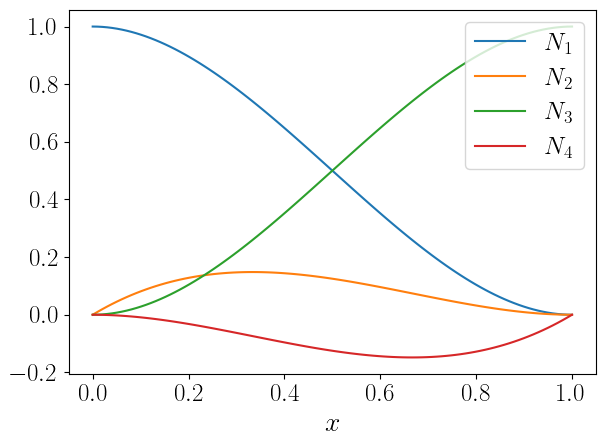

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.plot_config import configure_matplotlib
configure_matplotlib()


L = 1
x_vec = np.linspace(0, L, 100)

N_1 = 1 - 3 * x_vec**2/L**2 + 2 * x_vec**3/L**3
N_2 = x_vec - 2 * x_vec**2/L + x_vec**3/L**2
N_3 = 3 * x_vec**2/L**2 - 2 * x_vec**3/L**3
N_4 = - x_vec**2/L + x_vec**3/L**2

plt.plot(x_vec, N_1, label='$N_1$')
plt.plot(x_vec, N_2, label='$N_2$')
plt.plot(x_vec, N_3, label='$N_3$')
plt.plot(x_vec, N_4, label='$N_4$')
plt.xlabel('$x$')
plt.legend()
plt.show()

If the element is taken to be the reference element on length one $\xi = x / L$, the shape functions are given by

\begin{align*}
N_1 &= 1 - 3 \xi^2 + 2 \xi ^3 = (\xi - 1)^2 (2\xi +1), \\
N_2 &= L \xi (\xi - 1)^2, \\
N_3 &=3 \xi ^2 - 2 \xi ^3 = \xi^2 (3 - 2 \xi), \\
N_4 &= L \xi^2 (\xi - 1).
\end{align*}

Do you remark anything different with respect to the isoparametric elements for the truss case?


# Resources

[Lecture notes on finite elements for Euler Bernoulli beam from ETH](https://ethz.ch/content/dam/ethz/special-interest/baug/ibk/structural-mechanics-dam/education/femI/2021/Lecture5_2020.pdf) 